In [191]:
import pandas as pd
from matplotlib import pyplot as plt
from darts import TimeSeries
from darts.models import VARIMA

In [192]:
data=pd.read_csv('AirtrafficA4.csv')    
for column_name in ['TOTAL DEPARTURES','HOURS FLOWN','KILOMETRE FLOWN','PASSENGERS CARRIED','AVAILABLE SEAT KILOMETRE (IN THOUSAND)', ' FREIGHT CARRIED (IN TONNE)','MAIL CARRIED (IN TONNE)']:
    data[column_name]=data[column_name].str.replace(',','').astype(float)
    data[column_name]=(data[column_name].fillna(method='ffill')+data[column_name].fillna(method='bfill'))//2

/tmp/ipykernel_5121/1787535893.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column_name]=(data[column_name].fillna(method='ffill')+data[column_name].fillna(method='bfill'))//2
/tmp/ipykernel_5121/1787535893.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column_name]=(data[column_name].fillna(method='ffill')+data[column_name].fillna(method='bfill'))//2
/tmp/ipykernel_5121/1787535893.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column_name]=(data[column_name].fillna(method='ffill')+data[column_name].fillna(method='bfill'))//2
/tmp/ipykernel_5121/1787535893.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

In [193]:
data['NUMERIC_MONTH'] = data['MONTH'].str.strip().map({
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUNE': 6, 'JULY': 7,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
})
# print(pd.date_range(start='01-01-2013', end='09-01-2023', freq='M'))
data.sort_values(by=['YEAR', 'NUMERIC_MONTH'], inplace=True)
# data['ds'] = pd.to_datetime(pd.date_range(start='01-01-2013', periods=128, freq='d'))
data['ds']=pd.date_range(start='01-01-2013', end='09-01-2023', freq='ME')

In [189]:

new_data=data.set_index('ds')
series = TimeSeries.from_dataframe(new_data[['TOTAL DEPARTURES', 'HOURS FLOWN', 'KILOMETRE FLOWN', 'PASSENGERS CARRIED', 'AVAILABLE SEAT KILOMETRE (IN THOUSAND)', ' FREIGHT CARRIED (IN TONNE)', 'MAIL CARRIED (IN TONNE)']].iloc[:-8])

model = VARIMA(p=2,d=1,q=2,trend='c')

model.fit(series)

forecast = model.predict(n=20)

/home/aditya/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/home/aditya/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


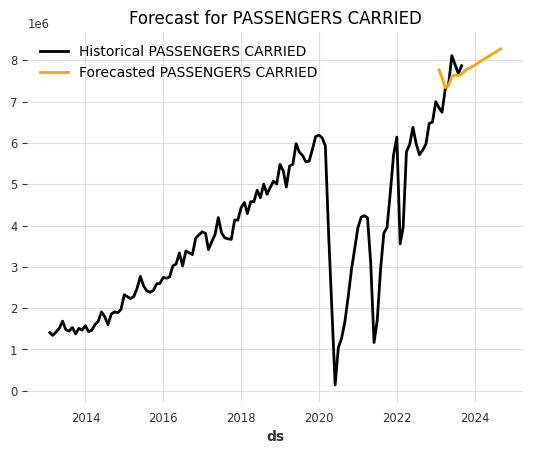

In [190]:
passenger_forecast = forecast["PASSENGERS CARRIED"]

plot_series = TimeSeries.from_dataframe(new_data[['TOTAL DEPARTURES', 'HOURS FLOWN', 'KILOMETRE FLOWN', 'PASSENGERS CARRIED', 'AVAILABLE SEAT KILOMETRE (IN THOUSAND)', ' FREIGHT CARRIED (IN TONNE)', 'MAIL CARRIED (IN TONNE)']])
plot_series["PASSENGERS CARRIED"].plot(label='Historical PASSENGERS CARRIED')
passenger_forecast.plot(label='Forecasted PASSENGERS CARRIED', color='orange')
plt.legend()
plt.title('Forecast for PASSENGERS CARRIED')
plt.show()


In [174]:
passenger_forecast.tail(20)

<TimeSeries (DataArray) (ds: 20, component: 1, sample: 1)> Size: 160B
array([[[7767697.42914386]],

       [[7573995.95296296]],

       [[7334472.56411809]],

       [[7393575.507654  ]],

       [[7613594.44940702]],

       [[7643024.74921921]],

       [[7627041.4834975 ]],

       [[7667802.62735317]],

       [[7744507.39355347]],

       [[7796686.51291794]],

       [[7834744.02696066]],

       [[7879605.4169646 ]],

       [[7934205.23841561]],

       [[7985002.1487933 ]],

       [[8031510.59857498]],

       [[8078689.36965889]],

       [[8128249.88478886]],

       [[8177604.00024864]],

       [[8225965.5277778 ]],

       [[8274256.51724704]]])
Coordinates:
  * ds         (ds) datetime64[ns] 160B 2023-01-31 2023-02-28 ... 2024-08-31
  * component  (component) object 8B 'PASSENGERS CARRIED'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [184]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(new_data.iloc[-8:]['PASSENGERS CARRIED'].to_list(), passenger_forecast.tail(20).head(8).values())

0.048295297698255246